# Step one: Import or collect tweets using a keyword or hashtag.

In [1]:
import configparser
CONFIG = configparser.ConfigParser()
CONFIG.read('credentials.ini')

['credentials.ini']

In [2]:
import tweepy

auth = tweepy.OAuthHandler(CONFIG['DEFAULT']['consumer_key'], CONFIG['DEFAULT']['consumer_secret'])
auth.set_access_token(CONFIG['DEFAULT']['access_token'], CONFIG['DEFAULT']['access_token_secret'])

api = tweepy.API(auth, wait_on_rate_limit=True)

public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

Curtis Sliwa, the Republican nominee for New York City mayor, tried — but was not allowed — to bring his cat Gizmo… https://t.co/LQ3FGRk6M2
Looks like I ran out of patience https://t.co/Thc75x6Ra6
RT @AngelictheVirgo: I honestly no longer have the energy for meaningless friendships, forced interactions or unnecessary conversations.
RT @Talk2Bolaa: If cutting me off makes you feel like your
life will be better, then do it. However. do
not try to come back when you reali…
I have no more business out here
The Atlanta Braves are one win away from their first championship since 1995. The Houston Astros are two wins away… https://t.co/rPfi1SalQW
This complex nebula is filled with glowing gases, lanes of dust and stars of all ages—but what interests astronomer… https://t.co/8oSJhViFln
The polls are now closed in New Jersey. (If you're waiting at your polling place, though, stay there — anyone who w… https://t.co/30eLj5ucAz
There are new magical memories to be made... ✨ Discover how some favor

# Step two: Use Pandas to sort and analyze your tweets

In [3]:
import pandas as pd

search_words = "#QUEERhalloween"
date_since = "2021-10-01"
tweets = tweepy.Cursor(api.search_tweets,
              q=search_words, lang="en").items(300)

tweets_sorted = [[tweet.user.screen_name, tweet.geo, tweet.user.location, tweet.text] for tweet in tweets]

# Step three: Calculate user coordinates, where feasible, for the set of collected tweets

In [4]:

tdf = pd.DataFrame(data=tweets_sorted, columns=['user', 'coordinates','location', 'tweet'])
print(tdf)

               user coordinates                   location  \
0   StormFrancesca9        None             TERF Island 😩😳   
1    bigchickenwing        None            UNDER BENS SINK   
2          lisahaas        None               New York, NY   
3       brigidkeely        None                Chicago, IL   
4     sparkymonster        None                 East Coast   
5         roza__000        None             Gdynia, Polska   
6         AltqMusic        None               Chicago, USA   
7   StormFrancesca9        None             TERF Island 😩😳   
8   ExquisiteGender        None               Georgia, USA   
9   StormFrancesca9        None             TERF Island 😩😳   
10    mountainlinus        None                              
11  BeauLineIsToxic        None  Haddonfield (Halloween V)   
12       ALTQRadio1        None                              
13         lisahaas        None               New York, NY   
14    KILLBRAINKILL        None                              
15    KI

In [5]:

locs = tdf['location'].value_counts()
print(locs)

                             7
Earth                        4
TERF Island 😩😳               3
New York, NY                 2
UNDER BENS SINK              1
Chicago, IL                  1
East Coast                   1
Gdynia, Polska               1
Chicago, USA                 1
Georgia, USA                 1
Haddonfield (Halloween V)    1
Montreal                     1
Online Directory             1
Schaumburg, Illinois         1
The City                     1
Name: location, dtype: int64


In [6]:

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent='twitter-analysis-client')
limited = RateLimiter(geolocator.geocode, min_delay_seconds=1)

def find_location(row):
    place = row['location']
    location = limited(place)
    
    if location != None:
        return location.latitude, location.longitude
    else:
        return "Not Found", "Not Found"

tdf[['latitude','longitude']] = tdf.apply(find_location, axis="columns", result_type="expand")
tdf

,user,coordinates,location,tweet,latitude,longitude
0,StormFrancesca9,None,TERF Island 😩😳,"RT @StormFrancesca9: Not a costume 🤭, but what...",Not Found,Not Found
1,bigchickenwing,None,UNDER BENS SINK,Happy #Halloween here's my last minute #costum...,Not Found,Not Found
2,lisahaas,None,"New York, NY",My LEZBOWEEN podcast episode has dropped! Chil...,40.712728,-74.006015
3,brigidkeely,None,"Chicago, IL",RT @BeauLineIsToxic: My glorious reign of terr...,41.875562,-87.624421
4,sparkymonster,None,East Coast,RT @BeauLineIsToxic: My glorious reign of terr...,1.310465,103.923513
5,roza__000,None,"Gdynia, Polska",Friends with Dorothy or friends with Harry\nFu...,54.516498,18.540274
6,AltqMusic,None,"Chicago, USA",RT @ALTQRadio1: HAPPY HALLOWEEN from Alt Q Rad...,41.875562,-87.624421
7,StormFrancesca9,None,TERF Island 😩😳,"Not a costume 🤭, but what the Hell it’s Hallow...",Not Found,Not Found
8,ExquisiteGender,None,"Georgia, USA",RT @ALTQRadio1: HAPPY HALLOWEEN from Alt Q Rad...,32.329381,-83.113737
9,StormFrancesca9,None,TERF Island 😩😳,"@AidanTheJester Definitely spooky 🎃😱👻🥰💜, hope ...",Not Found,Not Found


In [7]:

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (20, 10)

# Step four: Map the tweets using the calculated locations

/Users/smargar/opt/anaconda3/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


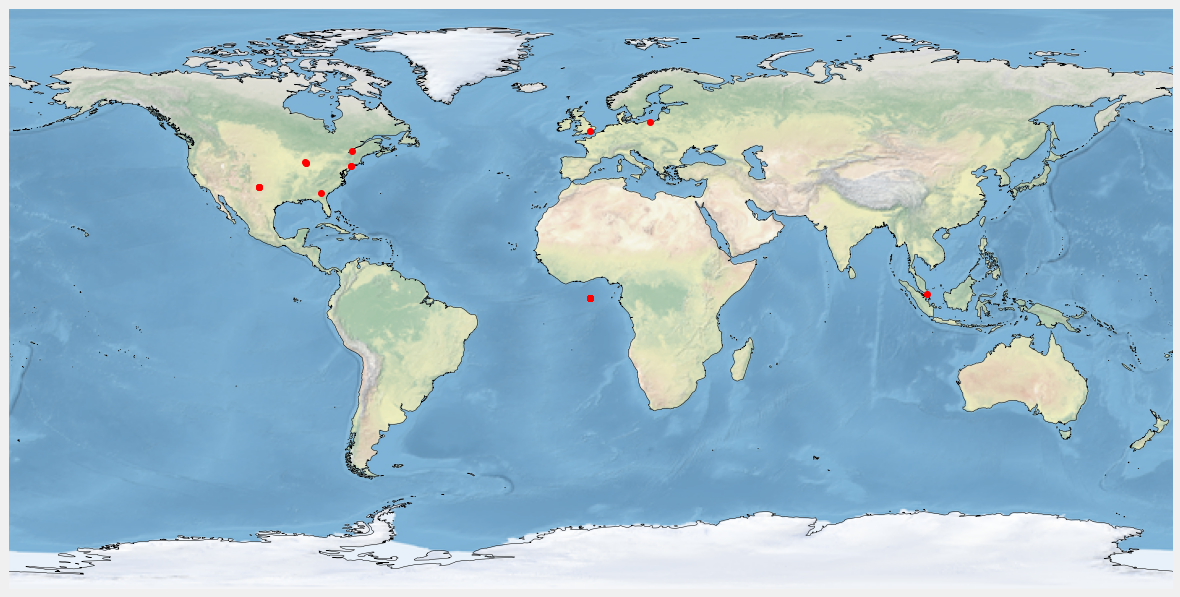

In [8]:
import cartopy.crs as ccrs
from matplotlib.patches import Circle

lats = tdf['latitude'].dropna()
longs = tdf['longitude'].dropna()

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
    
for i in range(0, len(lats)):
    ax.plot(longs[i], lats[i], 'ro', transform=ccrs.PlateCarree())
                                                                                              
ax.coastlines(resolution='50m')
ax.set_global()

plt.show()

In [9]:
counter = tdf.groupby(['latitude','longitude']).size().reset_index().rename(columns={0:'count'})

print(counter)

    latitude   longitude  count
0   1.310465  103.923513      1
1  32.329381  -83.113737      1
2  34.233137 -102.410749      4
3  40.712728  -74.006015      2
4  41.875562  -87.624421      2
5  42.033361  -88.083406      1
6  45.503182  -73.569806      1
7  51.515618   -0.091998      1
8  54.516498   18.540274      1
9  Not Found   Not Found     13


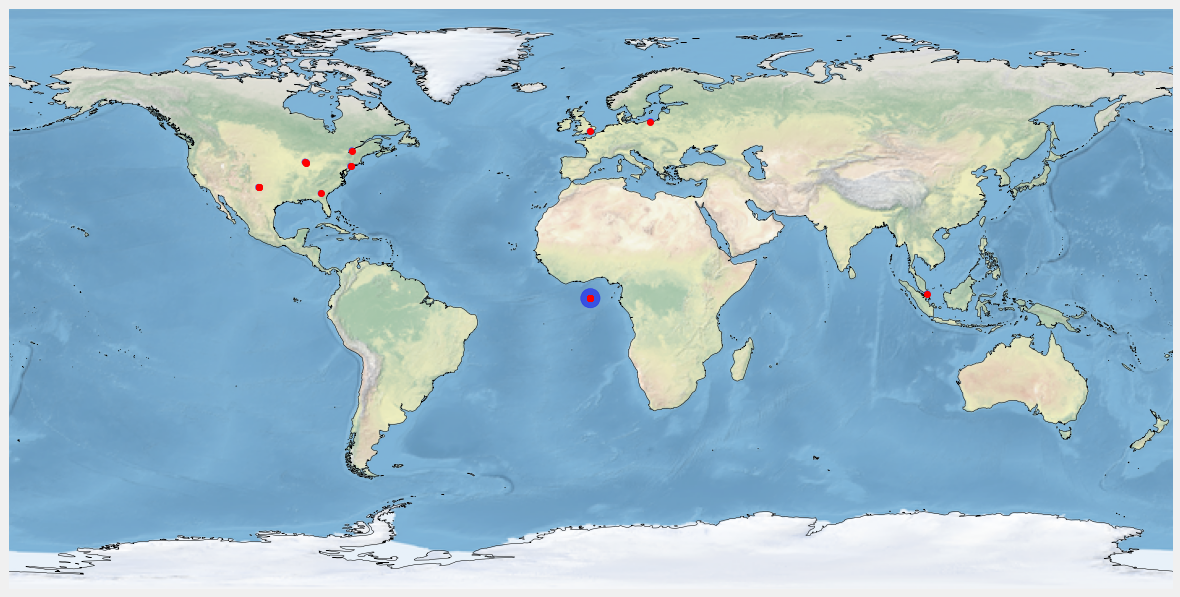

In [10]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
# plot individual locations                                                                                                       
for i in range(0, len(lats)):
    ax.plot(longs[i], lats[i], 'ro', transform=ccrs.PlateCarree())
                           
# add coastlines for reference                                                                                                
ax.coastlines(resolution='50m')
ax.set_global()
def get_radius(freq):
    if freq < 5:
        return 1
    elif freq < 10:
        return 2
    elif freq >= 10:
        return 3
# plot count of tweets per location

colLats = counter['latitude']
colLongs = counter['longitude']
colCounts = counter['count']

for i in range(0, len(counter)):
    ax.add_patch(Circle(xy=[colLongs[i], colLats[i]], radius=get_radius(colCounts[i]), color='blue',alpha=0.5, transform=ccrs.PlateCarree()))